In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking Null Values

In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Answer Questions

#### 1. Is charges distributed normally?

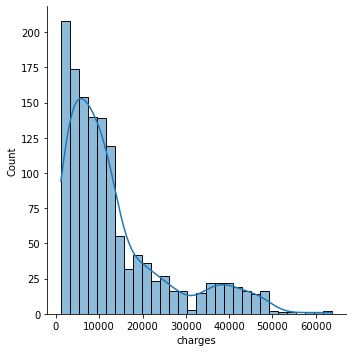

In [10]:
sns.displot(data["charges"], kde=True)

**Insight**: Charges is right-skewed. That means charges are concentrated around 10000 dollars. (We assume charges in dollar unit)

#### 2. How is age correlated to charges?

**#1**

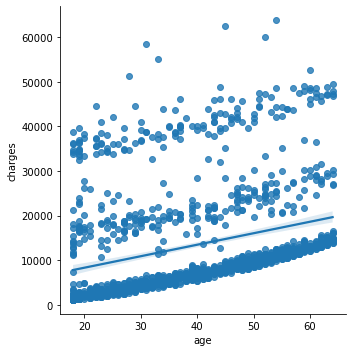

In [14]:
sns.lmplot(x="age", y="charges", data=data)

In [17]:
print(f"Correlation between age and charges: {np.corrcoef(data['age'], data['charges'])[0, 1]}")

Correlation between age and charges: 0.29900819333064754


Age and charges are moderately positive correlated.

**#2**

<AxesSubplot:xlabel='age', ylabel='charges'>

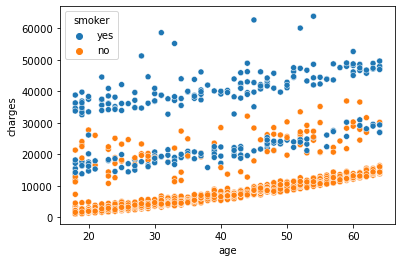

In [21]:
sns.scatterplot(x="age", y="charges", data=data, hue="smoker")

**Insight**: There is high probability that smokers have more charges than non-smokers. We will test them using hypothesis testing.

<AxesSubplot:xlabel='age', ylabel='charges'>

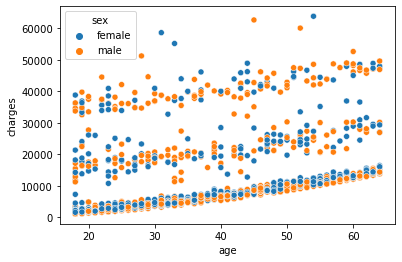

In [22]:
sns.scatterplot(x="age", y="charges", data=data, hue="sex")

**Insight**: Not found that sex affects amount of charges. We will test them using hypothesis testing.

#### 3. More Exploration on Sex Feature

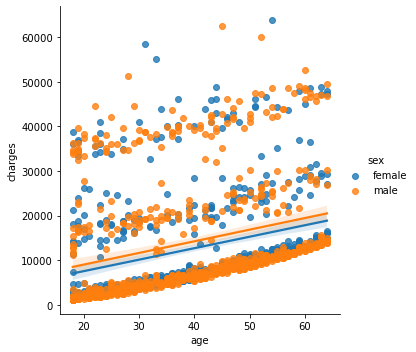

In [23]:
sns.lmplot(x="age", y="charges", data=data, hue="sex")

**Insight**: Based on the regression plot, it seems male's charges are bigger than female's. Explore more further in hypothesis testing.

In [28]:
# Check amount of people by sex whose charges are lower than mean of charges

charge_mean = data["charges"].mean()
lower_than_mean = data[data["charges"] < charge_mean]
sex_vs_lower_mean = lower_than_mean["sex"].value_counts()
sex_vs_lower_mean

female    463
male      455
Name: sex, dtype: int64

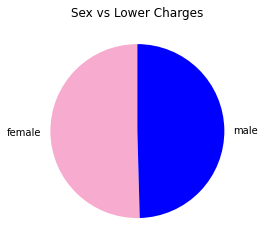

In [32]:
my_colors = ["#f7accf", "blue"]
plt.pie(sex_vs_lower_mean, labels=sex_vs_lower_mean.index, colors=my_colors, startangle=90)
plt.title("Sex vs Lower Charges")
plt.show()

**Insight**: Not found that sex affects amount of charges. We will test them using hypothesis testing.

#### 4. How is BMI correlated to charges?

**#1**

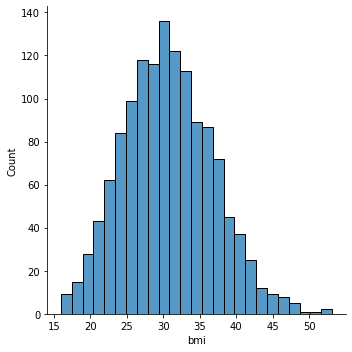

In [39]:
sns.displot(data["bmi"])

In [42]:
def bmi_func(bmi):
    """
    Return group which based on the bmi value
    """
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Healthy Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

data_bmi = data.copy()    
data_bmi["bmi_category"] = data_bmi["bmi"].apply(bmi_func)
data_bmi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


<AxesSubplot:xlabel='bmi_category', ylabel='charges'>

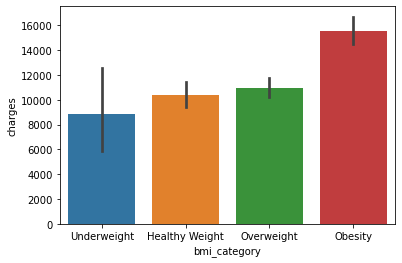

In [44]:
sns.barplot(x="bmi_category", y="charges", data=data_bmi, order=["Underweight", "Healthy Weight", "Overweight", "Obesity"])

**Insight**: BMI is positive correlated with charges.

**#2**

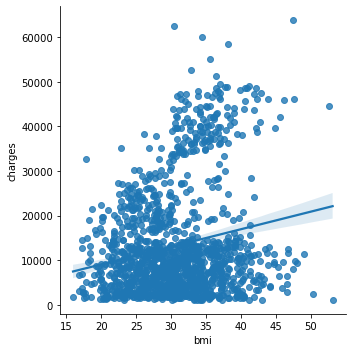

In [37]:
sns.lmplot("bmi", "charges", data=data)

In [38]:
print(f"Correlation between bmi and charges: {np.corrcoef(data['bmi'], data['charges'])[0, 1]}")

Correlation between bmi and charges: 0.19834096883362884


**Insight**: BMI is low-correlated with charges with value of 0.1983 (**< 0.2**). We will assume there is no correlation between them. However, previous insight shows there is probably positive correlation between them. We will check it through hypothesis testing.

#### 5. How are charges in many regions?

In [46]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='charges'>

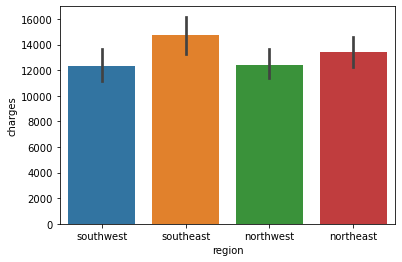

In [47]:
sns.barplot(x="region", y="charges", data=data)

**Insight**: Southeast region has the highest mean of charges among all regions. However, charges difference between regions is not too far. Therefore, we will check it by hypothesis testing.

#### To make it short, we use correlation heatmap

<AxesSubplot:>

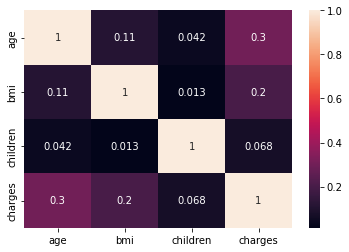

In [49]:
sns.heatmap(data.corr(), annot=True)

### Hypothesis Testing

In [50]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 1. Is the population mean of charges around 15.000 dollars?

In [58]:
H0 = "Population mean of charges is 14.000 dollars"
H1 = "Population mean of charges is not 14.000 dollars"

t_stat, p_val = stats.ttest_1samp(data["charges"], 13000)

if p_val < 0.01:
    print(f"At significant level of 0.01, {H1}")
elif p_val < 0.05:
    print(f"At significant level of 0.05, {H1}")
else:
    print(f"Fail to reject H0: {H0}")

Fail to reject H0: Population mean of charges is 14.000 dollars


#### 2. Do smokers have more charges than non-smokers?

In [66]:
non_smoker_charges = data[data["smoker"] == "no"]["charges"]
smoker_charges = data[data["smoker"] == "yes"]["charges"]

H0 = "Smokers have charges less than or equal to non-smokers'"
H1 = "Smokers have more charges than non-smokers"

t_stat, p_val = stats.ttest_ind(non_smoker_charges, smoker_charges, alternative="less")

if p_val < 0.01:
    print(f"At significant level of 0.01, {H1}")
elif p_val < 0.05:
    print(f"At significant level of 0.05, {H1}")
else:
    print(f"Fail to reject H0: {H0}")

At significant level of 0.01, Smokers have more charges than non-smokers


#### 3. Are charges not differ by gender?

In [68]:
male_charges = data[data["sex"] == "male"]["charges"]
female_charges = data[data["sex"] == "female"]["charges"]

H0 = "Male's charges is equal to female's"
H1 = "Male's charges is different to female's"

t_stat, p_val = stats.ttest_ind(male_charges, female_charges)

if p_val < 0.01:
    print(f"At significant level of 0.01, {H1}")
elif p_val < 0.05:
    print(f"At significant level of 0.05, {H1}")
else:
    print(f"Fail to reject H0: {H0}")

At significant level of 0.05, Male's charges is different to female's


In [72]:
H0 = "Male's charges is less than or equal to female's"
H1 = "Male's charges is more than female's"

t_stat, p_val = stats.ttest_ind(male_charges, female_charges, alternative="greater")

if p_val < 0.01:
    print(f"At significant level of 0.01, {H1}")
elif p_val < 0.05:
    print(f"At significant level of 0.05, {H1}")
else:
    print(f"Fail to reject H0: {H0}")

At significant level of 0.05, Male's charges is more than female's


#### 4. Are charges differ by BMI category?

In [74]:
underweight_charges = data_bmi[data_bmi["bmi_category"] == "Underweight"]["charges"]
healthy_charges = data_bmi[data_bmi["bmi_category"] == "Healthy Weight"]["charges"]
overweight_charges = data_bmi[data_bmi["bmi_category"] == "Overweight"]["charges"]
obesity_charges = data_bmi[data_bmi["bmi_category"] == "Obesity"]["charges"]

H0 = "All BMI categorized groups have the same population mean of charges"
H1 = "At least, a pair of groups have different mean of charges"

f_stat, p_val = stats.f_oneway(underweight_charges, healthy_charges, overweight_charges, obesity_charges)

if p_val < 0.01:
    print(f"At significant level of 0.01, {H1}")
elif p_val < 0.05:
    print(f"At significant level of 0.05, {H1}")
else:
    print(f"Fail to reject H0: {H0}")

At significant level of 0.01, At least, a pair of groups have different mean of charges


#### 5. Are charges differ by region?

In [76]:
southwest_charges = data_bmi[data["region"] == "southwest"]["charges"]
southeast_charges = data_bmi[data["region"] == "southeast"]["charges"]
northwest_charges = data_bmi[data["region"] == "northwest"]["charges"]
northeast_charges = data_bmi[data["region"] == "northeast"]["charges"]

H0 = "All Region categorized groups have the same population mean of charges"
H1 = "At least, a pair of groups have different mean of charges"

f_stat, p_val = stats.f_oneway(southwest_charges, southeast_charges, northwest_charges, northeast_charges)

if p_val < 0.01:
    print(f"At significant level of 0.01, {H1}")
elif p_val < 0.05:
    print(f"At significant level of 0.05, {H1}")
else:
    print(f"Fail to reject H0: {H0}")

At significant level of 0.05, At least, a pair of groups have different mean of charges


#### 6. Are charges differ by amount of children?

In [81]:
def children_func(children):
    """
    Return group which based on the bmi value
    """
    if children == 0:
        return "0"
    elif children <= 2:
        return "1-2"
    else:
        return "2+"

data_children = data.copy()
data_children["children_group"] = data_children["children"].apply(children_func)
data_children.head()

,age,sex,bmi,children,smoker,region,charges,children_group
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1-2
2,28,male,33.000,3,no,southeast,4449.46200,2+
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [82]:
child_0 = data_children[data_children["children_group"] == "0"]["charges"]
child_1_2 = data_children[data_children["children_group"] == "1-2"]["charges"]
child_2_plus = data_children[data_children["children_group"] == "2+"]["charges"]

H0 = "All Children categorized groups have the same population mean of charges"
H1 = "At least, a pair of groups have different mean of charges"

f_stat, p_val = stats.f_oneway(child_0, child_1_2, child_2_plus)

if p_val < 0.01:
    print(f"At significant level of 0.01, {H1}")
elif p_val < 0.05:
    print(f"At significant level of 0.05, {H1}")
else:
    print(f"Fail to reject H0: {H0}")

At significant level of 0.05, At least, a pair of groups have different mean of charges


<AxesSubplot:xlabel='children_group', ylabel='charges'>

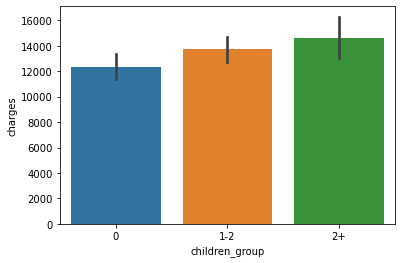

In [83]:
sns.barplot(x="children_group", y="charges", data=data_children)